# Eddy Tian

## Research question/interests

I'm curious if there is any correlation between the source material of an anime (light novel, manga, original) and it's rating and popularity, as well as which studios have the most popular and highest rated animes.

In [3]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 35)
pd.read_csv("../data/raw/anime.csv")

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28,39,1251960,61971,105808,718161,71513,26678,329800,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159,518,273145,1174,4143,208333,1935,770,57964,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266,201,558913,12944,29113,343492,25465,13925,146918,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481,1467,94683,587,4300,46165,5121,5378,33719,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710,4369,13224,18,642,7314,766,1108,3394,312,529,1242,1713,1068,634,265,83,50,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


#### Note: I'm aware of the code needed to display all rows but Jupyter Lab becomes very slow with all 17562 rows shown. As such I decided to keep it shortened. 

## Task 1 (EDA):

In [4]:
# import libraries
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("../data/raw/anime.csv")
print(df.info())
df.columns
# 35 columns is *a lot*, I'll definitely want to drop most of them to focus on what is needed to answer my research question
# looks like quite a few numerical columns aren't actually a numerical data type, I'll change that below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [6]:
print(df.nunique(axis=0))
# pop = 0 or completed = 0
# there are 1090 (!!!) different studios?? I may want to limit my research to studios with an average anime popularity above a certain amount,
# or with at least one anime above a certain popularity
# 16 different sources is quite a lot too, but I'll see if it's viable to analyze all of them

MAL_ID           17562
Name             17558
Score              533
Genres            5034
English name      6831
Japanese name    16679
Type                 7
Episodes           201
Aired            11947
Premiered          231
Producers         3783
Licensors          231
Studios           1090
Source              16
Duration           313
Rating               7
Ranked           10490
Popularity       11755
Members           9508
Favorites         1543
Watching          3580
Completed         7822
On-Hold           2915
Dropped           3035
Plan to Watch     7055
Score-10          3379
Score-9           3645
Score-8           4515
Score-7           4933
Score-6           4236
Score-5           3288
Score-4           2235
Score-3           1506
Score-2           1110
Score-1           1084
dtype: int64


In [7]:
df.describe()
# looks like some animes have a popularity of 0, which makes no sense as the minimum should be 1 (the most popular anime of all time)
# some also have never been completely watched by even a single person, so I'll exclude those results

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00,17562.00
mean,21477.19,8763.45,34658.54,457.75,2231.49,22095.57,955.05,1176.60,8199.83
std,14900.09,5059.33,125282.14,4063.47,14046.69,91009.19,4275.68,4740.35,23777.69
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,5953.50,4383.50,336.00,0.00,13.00,111.00,6.00,37.00,112.00
50%,22820.00,8762.50,2065.00,3.00,73.00,817.50,45.00,77.00,752.50
75%,35624.75,13145.00,13223.25,31.00,522.00,6478.00,291.75,271.00,4135.50
max,48492.00,17565.00,2589552.00,183914.00,887333.00,2182587.00,187919.00,174710.00,425531.00


In [8]:
df.Source.unique()
# was curious what exactly the different sources were, I may choose to focus on just Original, Manga, and Light Novel if need be

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Unknown', 'Other', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Card game',
       'Digital manga'], dtype=object)

In [9]:
df_cleaned = df.drop(['MAL_ID', 'Score-10','Score-9','Score-8','Score-7','Score-6','Score-5','Score-4','Score-3','Score-2','Score-1'], axis=1)
# I have no real use for individual scores when the mean average is already presented, so they'll be dropped
# each anime's internal MAL ID is also irrelevant

df_cleaned = df_cleaned[df_cleaned["Studios"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Source"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Score"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Ranked"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Episodes"] != "Unknown"]
# remove any animes with an unknown studio, source, or score, since I can't answer my research question on animes with no data in these areas
# also remove any anime with no rank or episode count

df_cleaned = df_cleaned[df_cleaned["Popularity"] > 0]
df_cleaned = df_cleaned[df_cleaned["Completed"] > 0]
# remove any animes that nobody has ever completely finished watching

df_cleaned['Ranked'] = df_cleaned['Ranked'].astype('int64')
df_cleaned['Score'] = df_cleaned['Score'].astype('float64')
df_cleaned['Episodes'] = df_cleaned['Episodes'].astype('int64')
# set rank, score, and episodes to numerical types

df_cleaned.shape

(7430, 24)

<AxesSubplot: >

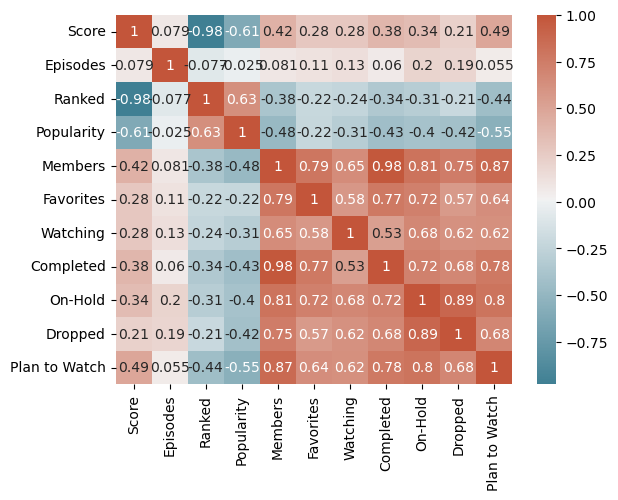

In [10]:
heatmap = df_cleaned.corr()# plot the heatmap
sns.heatmap(heatmap, xticklabels=heatmap.columns, yticklabels=heatmap.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# As a lower popularity and ranked score is actually better, any negative correlation for these is actually positive
# As expected, the more popular an anime is, the more people plan to watch it, and popular animes correlate somewhat with high scores
# funnily enough, there is a slight correlation between how long an anime is and how many peoples have it on hold or have dropped it
# (presumably because it was too long)

<AxesSubplot: ylabel='Frequency'>

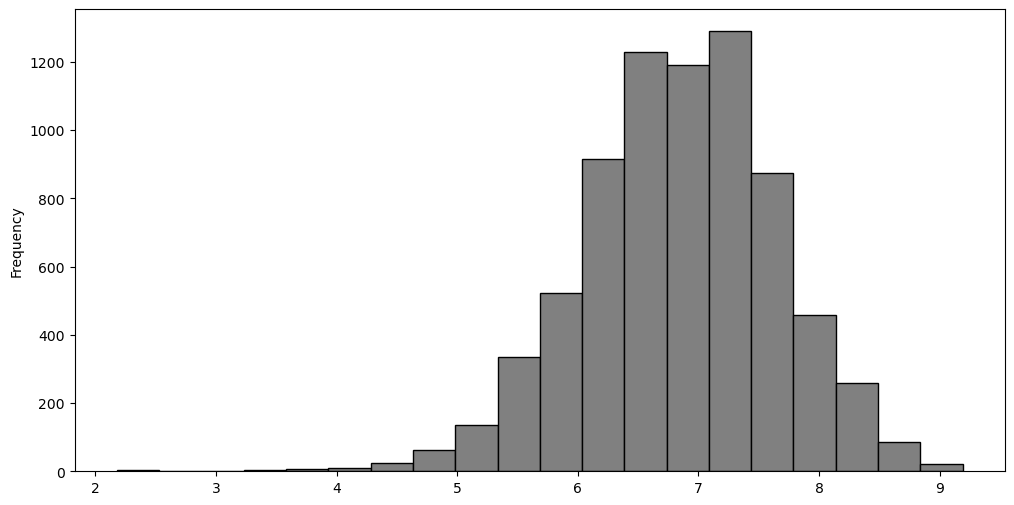

In [11]:
df_cleaned['Score'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
# it looks like the average anime gets scored around 6.5 to 7.5, with exceedingly few being scored below 5 or above 9

<AxesSubplot: >

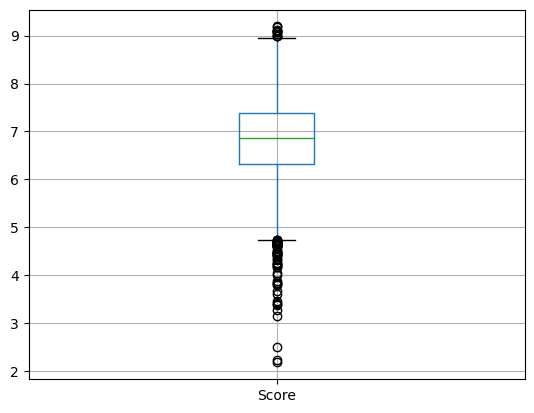

In [12]:
df_cleaned.boxplot('Score')
# makes my findings from the above histogram a bit more obvious, the average score seems to lie closer to around 6.8
# anything above 9 or below around 4.7 is enough to be considered an outlier

<AxesSubplot: xlabel='Source', ylabel='count'>

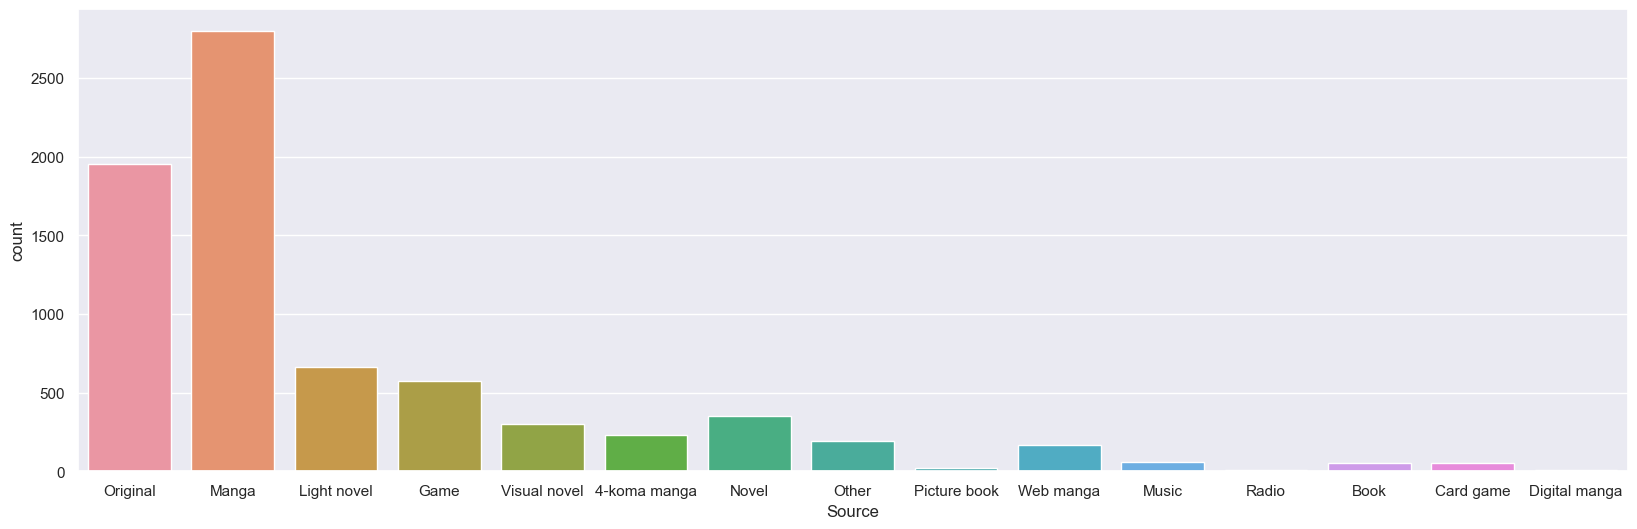

In [13]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.countplot(x=df_cleaned["Source"])
# manga adaptations and anime originals are overwhelmingly the most common sources, with light novels coming in a distant third

<AxesSubplot: xlabel='Source', ylabel='Score'>

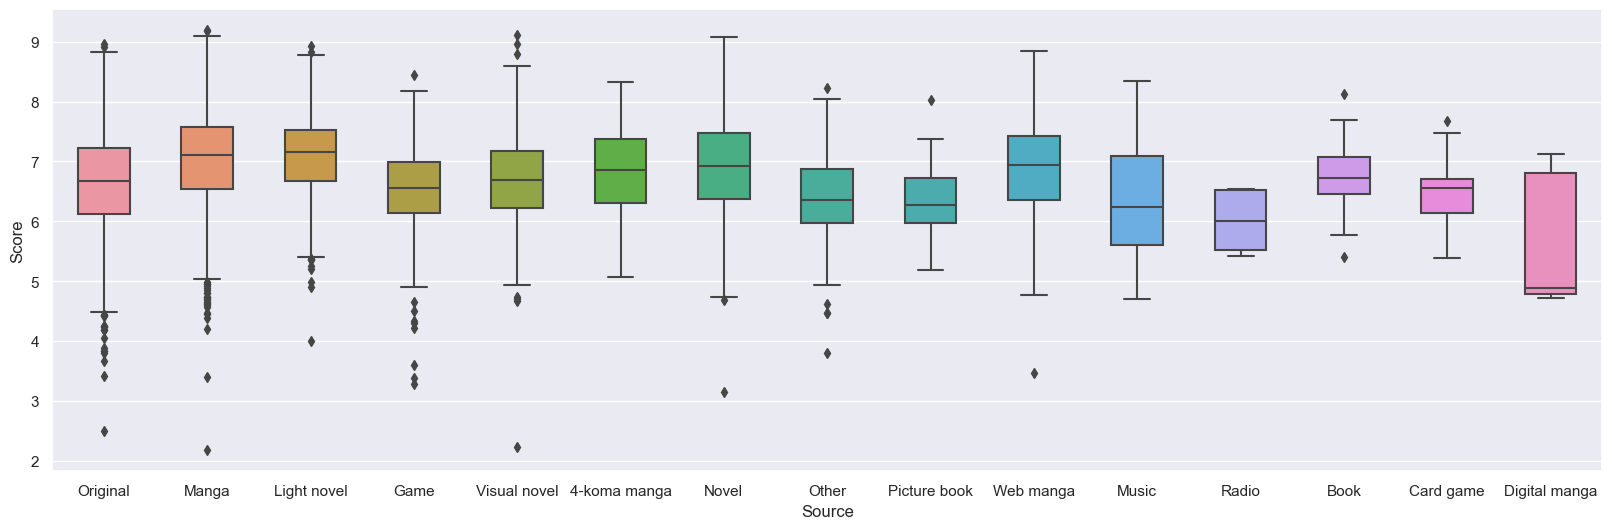

In [14]:
sns.boxplot(data=df_cleaned, x="Source", y="Score", width = 0.5)
# this is really cool and directly answers one of my research questions
# it seems manga and light novel adaptions on average have the highest score

<AxesSubplot: xlabel='Source', ylabel='Popularity'>

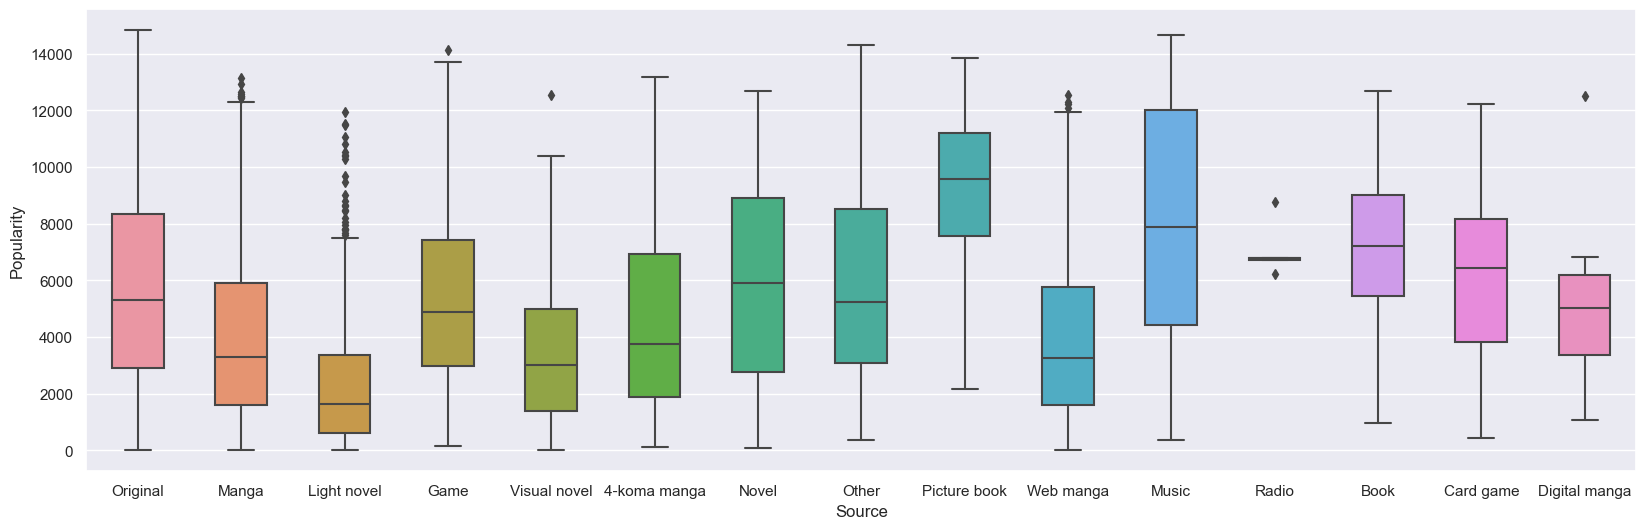

In [15]:
sns.boxplot(data=df_cleaned, x="Source", y="Popularity", width = 0.5)
# remembering again that lower popularity is actually more popular, we can see that light novel adaptations are vastly more popular on average
# very surprising considering how few light novel adaptions there are compared to manga adaptations and anime originals

## Task 2: Analysis Pipeline



In [16]:
df = pd.read_csv("../data/raw/anime.csv", usecols = ["Name", "Score", "Source", "Studios", "Ranked", "Popularity", "Completed"])
# 1. load csv

df_cleaned = df[df["Studios"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Source"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Score"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Ranked"] != "Unknown"]
df_cleaned = df_cleaned[df_cleaned["Popularity"] > 0]
df_cleaned = df_cleaned[df_cleaned["Completed"] > 0]
df_cleaned['Ranked'] = df_cleaned['Ranked'].astype('int64')
df_cleaned['Score'] = df_cleaned['Score'].astype('float64')
# 2. clean data

# Mean_Popularity_by_Source = df_cleaned.groupby("Source")["Popularity"].mean()
# Mean_Ranking_by_Source = df_cleaned.groupby("Source")["Score"].mean()
# 3. process data

# 4: No additional wrangling needed

# pd.set_option('display.max_rows', 100)
# print(Mean_Popularity_by_Source.sort_values(axis = 0))
# Mean_Ranking_by_Source.sort_values(axis = 0, ascending = False)
df_cleaned


,Name,Score,Studios,Source,Ranked,Popularity,Completed
0,Cowboy Bebop,8.78,Sunrise,Original,28,39,718161
1,Cowboy Bebop: Tengoku no Tobira,8.39,Bones,Original,159,518,208333
2,Trigun,8.24,Madhouse,Manga,266,201,343492
3,Witch Hunter Robin,7.27,Sunrise,Original,2481,1467,46165
4,Bouken Ou Beet,6.98,Toei Animation,Manga,3710,4369,7314
...,...,...,...,...,...,...,...
17478,Santa Company: Manatsu no Merry Christmas,5.68,ORENDA,Original,9202,9286,985
17502,Shin Gengou Nyankogelion,6.41,PONOS Corporation,Original,6360,12289,390
17505,Heikousen,7.52,"10Gauge, Studio DURIAN",Original,1517,10869,549
17513,Yakusoku no Neverland 2nd Season: Michishirube,4.81,CloverWorks,Manga,10760,4398,8196


## Task 3: Method Chaining

In [17]:
def load_and_process(data):

    df = (
    pd.read_csv(data, usecols = ["Name", "Score", "Source", "Studios", "Ranked", "Popularity", "Completed"])
    .pipe(lambda x: x.loc[x['Studios'] != "Unknown"]) 
    .pipe(lambda x: x.loc[x['Score'] != "Unknown"])
    .pipe(lambda x: x.loc[x['Ranked'] != "Unknown"])
    .pipe(lambda x: x.loc[x['Source'] != "Unknown"])
    )
    # load data and remove rows with unknowns

    df2 = (
    df
    .pipe(lambda x: x.loc[x['Popularity'] > 0])
    .pipe(lambda x: x.loc[x['Completed'] > 0])
    .assign(Score = df.Score.astype('float64'))
    .assign(Popularity = df.Popularity.astype('int64'))
    )
    # remove animes that nobody has ever fully completed and convert score and popularity to numerical types

    return df2

In [18]:
load_and_process("../data/raw/anime.csv").head()
# test method chain 

,Name,Score,Studios,Source,Ranked,Popularity,Completed
0,Cowboy Bebop,8.78,Sunrise,Original,28,39,718161
1,Cowboy Bebop: Tengoku no Tobira,8.39,Bones,Original,159,518,208333
2,Trigun,8.24,Madhouse,Manga,266,201,343492
3,Witch Hunter Robin,7.27,Sunrise,Original,2481,1467,46165
4,Bouken Ou Beet,6.98,Toei Animation,Manga,3710,4369,7314


## Task 4: Data Analysis

<AxesSubplot: xlabel='Source', ylabel='count'>

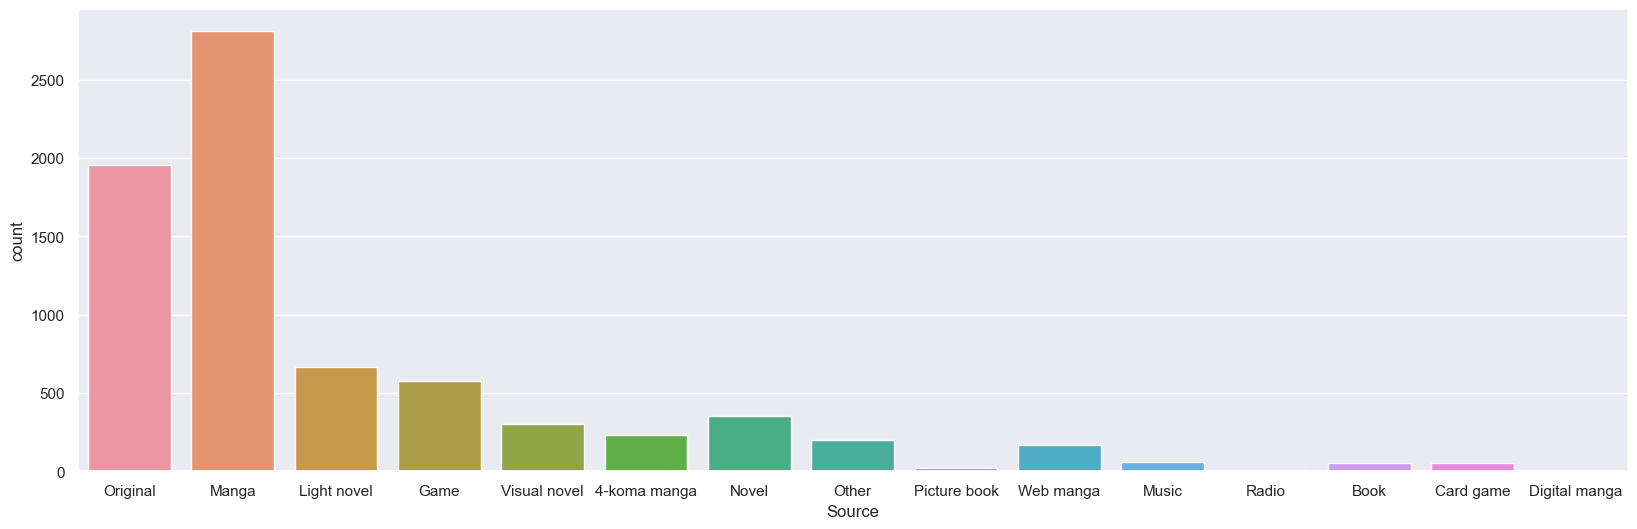

In [21]:
df = load_and_process("../data/raw/anime.csv")

sns.set(rc = {'figure.figsize':(20,6)})
sns.countplot(x=df["Source"])
# 

same graph as from my PDA, it seems that manga adaptations are overwhelmingly the most common, followed by anime originals